In [730]:
import os
import ssl
import sklearn
import numpy as np
from sklearn.metrics import r2_score
import spacy
import re
import gensim
from gensim.models.keyedvectors import KeyedVectors
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn import svm
import textblob
from textblob import TextBlob, Word
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix


In [731]:
data = pd.read_csv('/home/nausheen/SMAI2/Datasets/Question-3/airfoil.csv',header=None)
train_set=data.sample(frac=0.8,random_state=200) #random state is a seed value
test_set=data.drop(train_set.index)
target_train = train_set[5]
target_test = test_set[5]
train_set.drop([5],axis=1,inplace = True)
test_set.drop([5],axis=1,inplace = True)
print(train_set.shape)

(962, 5)


In [732]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# train = scaler.fit_transform(train_set)
# test = scaler.fit_transform(test_set)

# train = pd.DataFrame(train)
# print(train.shape)

# test = pd.DataFrame(test)
# print(test.shape)

In [733]:
import pandas as pd
from sklearn import preprocessing

x = train_set.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
train = pd.DataFrame(x_scaled)

y=test_set.values
min_max_scaler = preprocessing.MinMaxScaler()
y_scaled = min_max_scaler.fit_transform(y)
test = pd.DataFrame(y_scaled)

In [734]:
train.insert(5,"additional",1)
test.insert(5,"additional",1)

In [735]:
print(len(train))
X = train.values
print(X)

962
[[0.03030303 0.         0.09090909 0.         0.00709322 1.        ]
 [0.19191919 0.09009009 0.72727273 0.6010101  0.04713909 1.        ]
 [0.09090909 0.06756757 1.         0.19949495 0.06068524 1.        ]
 ...
 [0.07070707 0.88738739 0.09090909 0.19949495 0.6220123  1.        ]
 [0.07070707 0.57207207 0.         1.         0.20306831 1.        ]
 [0.         0.32882883 0.72727273 0.6010101  0.18565425 1.        ]]


In [736]:
# from random import seed
# from random import random
# seed(4)
# old_theta=[]
# for i in range(0,6):
#     old_theta.append(random())
# print(old_theta)
old_theta = [1,0,1,0,1,0]

In [737]:

def find_li(alp): 
    global old_theta
    alpha = alp
    theta=[]
    m=len(target_train)
    list_of_cost=[]
    print(m)
    iterations = 100000
    while(iterations > 0):
        iterations = iterations -1
        E = (np.dot(X,old_theta)-target_train)
    #     print(X.shape)
        dz = (1/m)*(np.dot(X,old_theta)-target_train)
        dj = np.dot(dz,X)
        cost = (1/(2*m))*np.sum(np.square(np.dot(X,old_theta)-target_train))
        if(iterations==100 or iterations==1000 or iterations==10000 or iterations==20000):
            list_of_cost.append(cost)
        theta = old_theta - alpha*(dj)
        old_theta = theta
    Y = test.values
    m1 = len(target_test)
    print("cost ",list_of_cost)
    predict_label = np.dot(theta,Y.T)
    R2_score = r2_score(target_test, predict_label)
    print("R2 score",R2_score)
    return list_of_cost

In [727]:
def find_lis(old_theta): 
    alpha = 0.001
    theta=[]
    m=len(target_train)
    list_of_cost=[]
    print(m)
    iterations = 100000
    while(iterations > 0):
        iterations = iterations -1
        E = (np.dot(X,old_theta)-target_train)
    #     print(X.shape)
        dz = (1/m)*(np.dot(X,old_theta)-target_train)
        dj = np.dot(dz,X)
        cost = (1/(2*m))*np.sum(np.square(np.dot(X,old_theta)-target_train))
        if(iterations==100 or iterations==1000 or iterations==10000 or iterations==100000):
            list_of_cost.append(cost)
        theta = old_theta - alpha*(dj)
        old_theta = theta
    Y = test.values
    m1 = len(target_test)
    print("cost ",list_of_cost)
    predict_label = np.dot(theta,Y.T)
    R2_score = r2_score(target_test, predict_label)
    print("R2 score",R2_score)
    return list_of_cost

962
cost  [11.495276191382718, 11.495276191382718, 11.495276191382718, 11.495276191382718]
R2 score 0.520829119343903
962
cost  [11.495276191382718, 11.495276191382718, 11.495276191382718, 11.495276191382718]
R2 score 0.520829119343903
962
cost  [11.495276191382718, 11.495276191382718, 11.495276191382718, 11.495276191382718]
R2 score 0.520829119343903


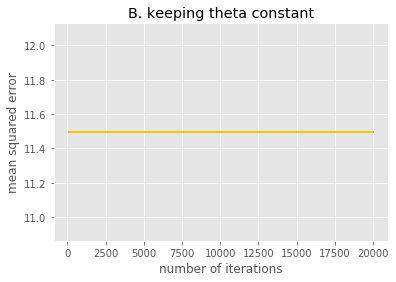

In [739]:
import matplotlib.pyplot as plt 
itr = [100,1000,10000,20000] 
cost1 = find_li(0.001)
plt.plot(itr, cost1,color='green') 
itr = [100,1000,10000,20000] 
cost2 = find_li(0.01)
plt.plot(itr, cost2,color='red') 
itr = [100,1000,10000,20000] 
cost2 = find_li(0.1)
plt.plot(itr, cost2,color='yellow') 
plt.xlabel('number of iterations') 
plt.ylabel('mean squared error')  
plt.title('B. keeping theta constant')  
plt.show() 

# A. keeping alpha constant , number of iterations(x-axis) vs mean squared error(y-axis)

962
cost  [13.135414070754495, 12.755192275163585, 12.723017367246518]
R2 score 0.49076116104298706
962
cost  [13.177005263004661, 12.785730427048712, 12.752641772760613]
R2 score 0.4896329657494207
962
cost  [13.157821761749235, 12.768987318579494, 12.73613697838705]
R2 score 0.4899557273664862


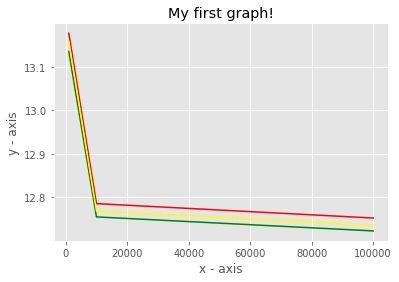

In [729]:
itr = [1000,10000,100000] 
cost1 = find_lis([0,0,0,0,0,0])
plt.plot(itr, cost1,color='green') 
itr = [1000,10000,100000] 
cost2 = find_lis([1,1,1,1,1,1])
plt.plot(itr, cost2,color='red') 
itr = [1000,10000,100000] 
cost2 = find_lis([1,0,1,0,1,0])
plt.plot(itr, cost2,color='yellow') 
plt.xlabel('x - axis') 
plt.ylabel('y - axis')  
plt.title('My first graph!')  
plt.show() 

# # alpha = 0.001,cost  11.495276191382722
R2 score 0.5247646720677728,cost  11.495276191382722,R2 score 0.5247646720677657,cost  11.495276191382722
R2 score 0.5247646720677728,cost  11.495276191382722
R2 score 0.5247646720677728

# alpha = 0.01,cost  11.49527619138272
R2 score 0.5247646720677728,cost  11.495276191382722
R2 score 0.5247646720677672,cost  11.495276191382722
R2 score 0.5247646720677661,cost  11.495276191382722
R2 score 0.5247646720677661

# alpha = 0.1,cost  11.495276191382718
R2 score 0.5247646720677658,cost  11.495276191382718
R2 score 0.5247646720677658,cost  11.495276191382718
R2 score 0.5247646720677658,cost  11.495276191382718
R2 score 0.5247646720677658

# 